<a href="https://colab.research.google.com/github/tintamaria95/CocoriGo/blob/main/importGolois_MLD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.lamsade.dauphine.fr/~cazenave/project2022.zip
!unzip project2022.zip

--2022-11-10 12:17:24--  https://www.lamsade.dauphine.fr/~cazenave/project2022.zip
Resolving www.lamsade.dauphine.fr (www.lamsade.dauphine.fr)... 193.48.71.250
Connecting to www.lamsade.dauphine.fr (www.lamsade.dauphine.fr)|193.48.71.250|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 138784129 (132M) [application/zip]
Saving to: ‘project2022.zip’

project2022.zip     100%[===================>] 132.35M  25.6MB/s    in 5.7s    

2022-11-10 12:17:30 (23.1 MB/s) - ‘project2022.zip’ saved [138784129/138784129]

Archive:  project2022.zip
  inflating: Board.h                 
  inflating: Game.h                  
  inflating: Rzone.h                 
  inflating: compile.sh              
  inflating: compileMAC.sh           
  inflating: games.data              
  inflating: golois.cpp              
  inflating: golois.cpython-310-x86_64-linux-gnu.so  
  inflating: golois.cpython-37m-x86_64-linux-gnu.so  
  inflating: golois.cpython-38-x86_64-linux-gnu.so  
  inflat

In [ ]:
!python golois.py

getValidation
r.shape = (10000, 19, 19, 31)
nbExamples = 10000
tcmalloc: large alloc 2400002048 bytes == 0x57512000 @  0x7fb2bd8fb887 0x7fb24346b0d9 0x7fb24347085f 0x7fb24348506f 0x58f6e4 0x5105e2 0x5b4ee6 0x6005a3 0x607796 0x60785c 0x60a436 0x64db82 0x64dd2e 0x7fb2bd4f6c87 0x5b636a
nbPositionsSGF = 29425326
nbPositionsSGF = 29425326
generating validation.data
2022-11-10 12:18:04.891002: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 board (InputLayer)             [(None, 19, 19, 31)  0           []                               
                                ]                                                                 
          

# Comparaison de modèles

getValidation

*******************
test0.h5
loss : 4.786556720733643
policy_loss : 4.084075450897217
value_loss : 0.6930094957351685
policy_categorical_accuracy : 0.15559999644756317
value_mse : 0.1199781522154808


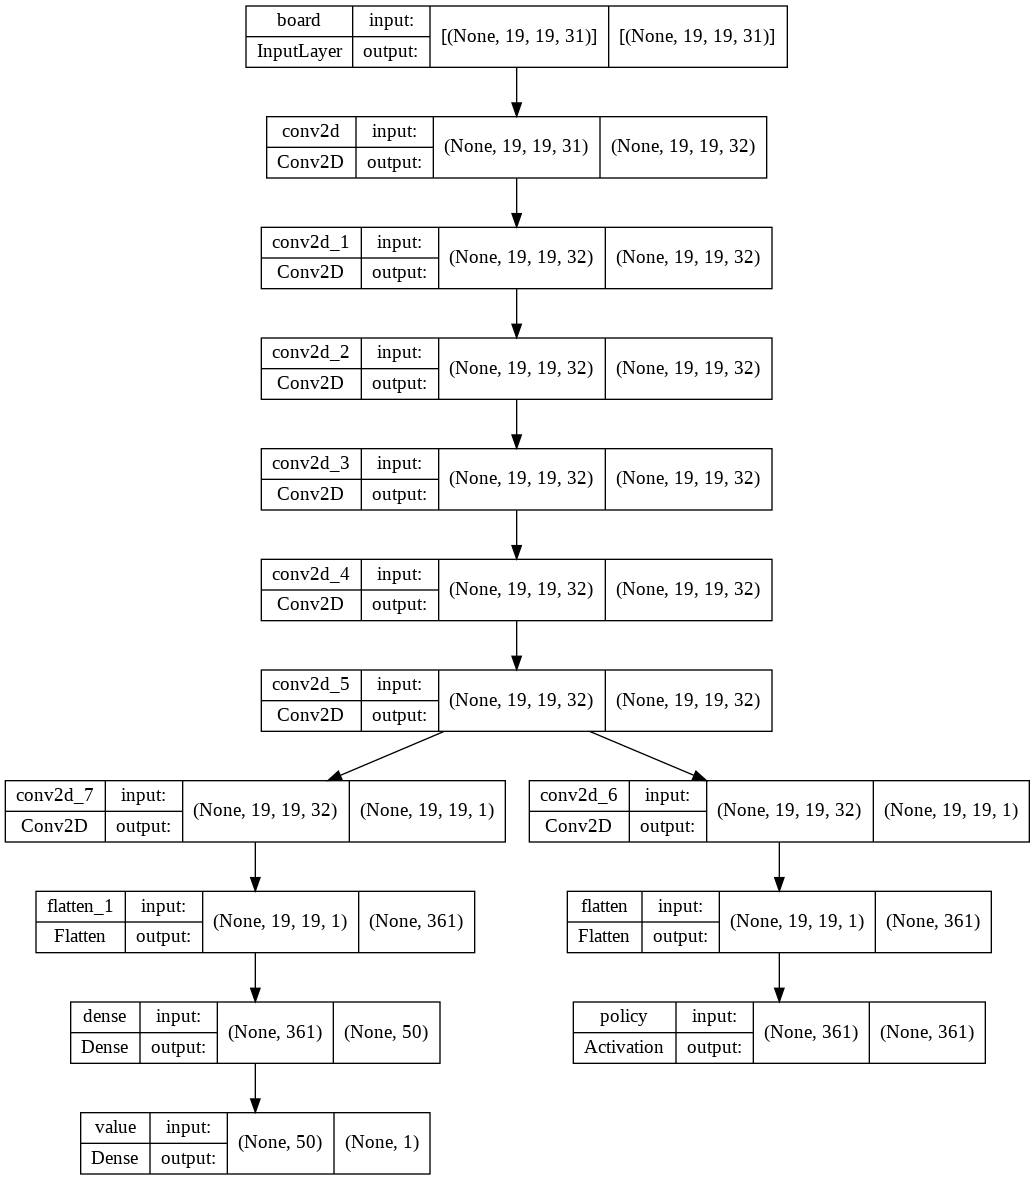


*******************
test1.h5
loss : 6.539865016937256
policy_loss : 5.838715553283691
value_loss : 0.6918559670448303
policy_categorical_accuracy : 0.01119999960064888
value_mse : 0.11940239369869232


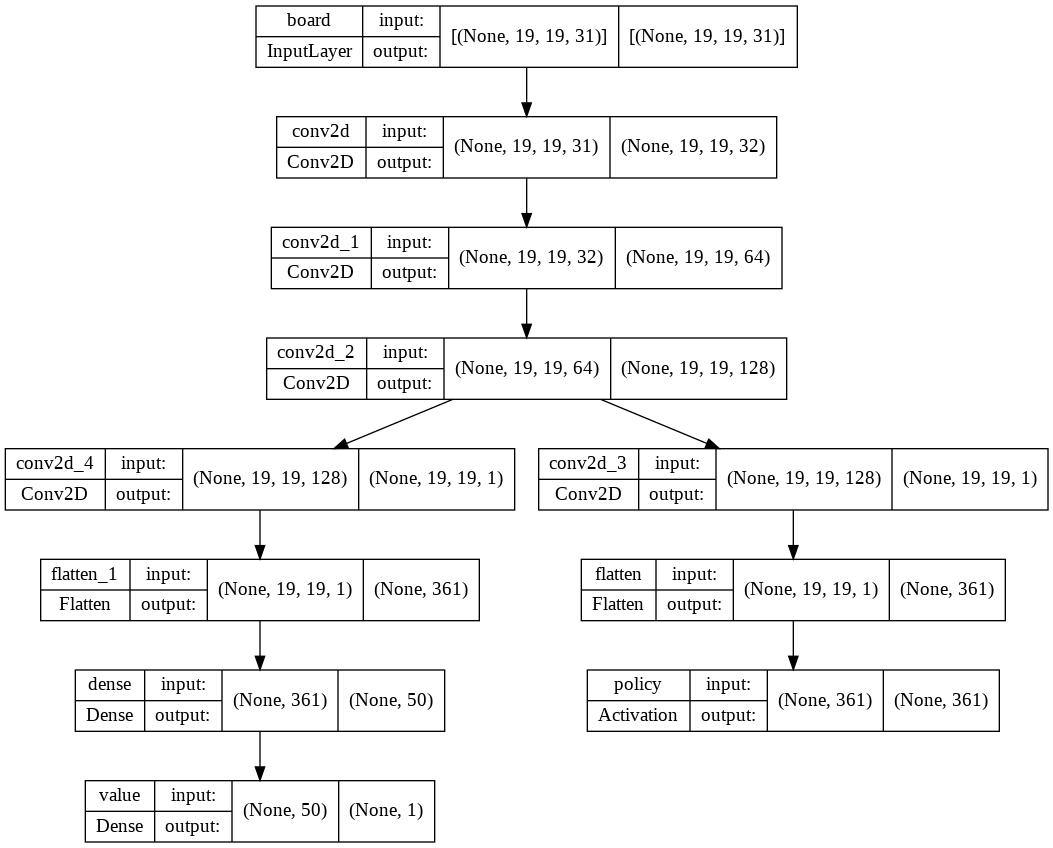

In [ ]:
from tensorflow import keras
import numpy as np
import gc

import golois

planes = 31
moves = 361
N = 10000
batch = 128

input_data = np.random.randint(2, size=(N, 19, 19, planes))
input_data = input_data.astype ('float32')
policy = np.random.randint(moves, size=(N,))
policy = keras.utils.to_categorical (policy)
value = np.random.randint(2, size=(N,))
value = value.astype ('float32')
end = np.random.randint(2, size=(N, 19, 19, 2))
end = end.astype ('float32')
groups = np.zeros((N, 19, 19, 1))
groups = groups.astype ('float32')
print ("getValidation", flush = True)
golois.getValidation (input_data, policy, value, end)
golois.getValidation (input_data, policy, value, end)

# Load models
nb_models = 1
for i in range(nb_models):
  model_name = "test" + str(i) + ".h5"
  model = keras.models.load_model(model_name)
  m_names = model.metrics_names

  val = model.evaluate (input_data,
                        [policy, value], verbose = 0, batch_size=batch)
  print("")
  print("*******************")
  print(model_name)
  for i, metric in enumerate(m_names):
    print(metric, ":", val[i])
  display(keras.utils.plot_model(model, str(model_name + ".png"), show_shapes=True))